<a href="https://colab.research.google.com/github/mia1996/rlcard-tutoirial/blob/master/blackjack_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Deep-Q Learning on Blackjack**
This example is to use Deep-Q learning to train an agent on Blackjack. We aim to use this example to show how reinforcement learning algorithms can be developed and applied in our toolkit. To be self-contained, we first install rlcard.

In [ ]:
!pip install rlcard[torch]

     |████████████████████████████████| 268 kB 8.3 MB/s 
     |████████████████████████████████| 181 kB 41.9 MB/s 
     |████████████████████████████████| 63 kB 922 kB/s 
  Created wheel for rlcard: filename=rlcard-1.0.7-py3-none-any.whl size=325373 sha256=dd6ec050c7312061d299e960ea393b346a9278484233bb6c92c0f87c7b1d4d90
  Stored in directory: /root/.cache/pip/wheels/8a/90/bd/bc402a48ca90970c9a7c2c4387dcb885fdf6073ec231a605ad
Successfully built rlcard


Now we import `rlcard` and `DQNAgent`. The `DQNAgent` will learn how to win the game.

In [ ]:
import rlcard
from rlcard.agents import DQNAgent

Let's create the Blackjack environment and and take a look at it.

In [ ]:
env = rlcard.make("blackjack")
print("Number of actions:", env.num_actions)
print("Number of players:", env.num_players)
print("Shape of state:", env.state_shape)
print("Shape of action:", env.action_shape)

Number of actions: 2
Number of players: 1
Shape of state: [[2]]
Shape of action: [None]


Blackjack is a very simple game with only two possible actions. There is only one player. It's it time to our DQN to master this game! We first create a DQNAgent.

In [ ]:
agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[64,64],
)

Here, we use a 64-64 deep neural network to learn. Then we pass the DQNAgent to the environment.

In [ ]:
env.set_agents([agent])

Now we are ready to train! We first import some useful classes and functions for training.

In [ ]:
from rlcard.utils import (
    tournament,
    reorganize,
    Logger,
    plot_curve,
)

Then start the training and log the performance with our `Logger`. The script below will trian DQN for 1000 epochs (i.e., 1000 games). Usually, the agent will become stronger if trained longer.

In [ ]:
with Logger("experiments/leduc_holdem_dqn_result/") as logger:
    for episode in range(1000):

        # Generate data from the environment
        trajectories, payoffs = env.run(is_training=True)

        # Reorganaize the data to be state, action, reward, next_state, done
        trajectories = reorganize(trajectories, payoffs)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    env,
                    10000,
                )[0]
            )

    # Get the paths
    csv_path, fig_path = logger.csv_path, logger.fig_path


----------------------------------------
  timestep     |  552308
  reward       |  -1.0
----------------------------------------

----------------------------------------
  timestep     |  571353
  reward       |  -1.0
----------------------------------------
INFO - Step 100, rl-loss: 1.7699662446975708
INFO - Copied model parameters to target network.
INFO - Step 142, rl-loss: 1.4145885705947876
----------------------------------------
  timestep     |  590632
  reward       |  -0.8554
----------------------------------------
INFO - Step 210, rl-loss: 1.2130974531173706
----------------------------------------
  timestep     |  608418
  reward       |  -0.7016
----------------------------------------
INFO - Step 280, rl-loss: 1.1429738998413086
----------------------------------------
  timestep     |  625811
  reward       |  -0.6066
----------------------------------------
INFO - Step 348, rl-loss: 0.9004282355308533
----------------------------------------
  timestep     |  64294

Now we plot the learning curves to monitor how the agent gets improved!

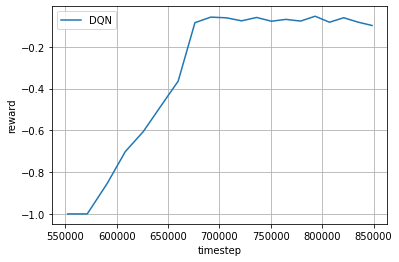

In [ ]:
plot_curve(csv_path, fig_path, "DQN")

You can find that the agent achieves a better and better performance with more training. All the logs and the model weights are saved in `experiments/leduc_holdem_dqn_result/`. Now you have your trained DQN agent on Blackjack!